In [1]:
from islpy import *
import islplot.plotter as islp

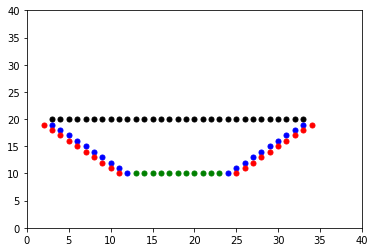

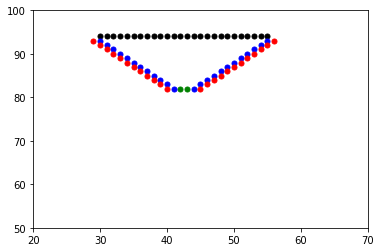

In [2]:
pre = Map('[T,I,W]->{ [t,i]->[0,t,i,0]}')
M = Map('''[T,I,W]->{ 
                    [0,t,i,p]->[0,t-1,i,p+1] : 0<(i-I)+(t-T) and (i-I)-(t-T)<W;
                    [0,t,i,p]->[1,t-1,i,p+1] : 0=(i-I)+(t-T) or (i-I)-(t-T)=W;
                    [0,t,i,p]->[2,t-1,i-1,p+1] : 0=(i-I)+(t-T);
                    [0,t,i,p]->[2,t-1,i+1,p+1] : (i-I)-(t-T)=W;
                    [1,t,i,p]->[1,t,i,p] ;
                    [2,t,i,p]->[2,t,i,p] ;
        }''')
Mp, exact = M.power()

#print('Mp:', Mp)
#print()
#for mp in Mp.get_basic_maps():
#    print(mp)

if not exact:
    raise Exception('power not exact')

def plot_all(bset, T, I, W, depth, size=10, limits=None, fig=None):
    domain = BasicSet('[T={},I={},W={}]->{{[T,i] : I<=i<=I+W}}'.format(T, I, W))
    D = BasicSet('[T,I,W]->{{[{}]}}'.format(depth))
    image = bset.intersect(domain).apply(pre).apply(D.apply(Mp).unwrap())

    K = bset.intersect(domain)
    G = image.apply(BasicMap('[T,I,W]->{[0,t,i,p]->[t,i]}'))
    B = image.apply(BasicMap('[T,I,W]->{[1,t,i,p]->[t,i]}'))
    R = image.apply(BasicMap('[T,I,W]->{[2,t,i,p]->[t,i]}'))
    
    # plotting code
    if not fig:
        fig = islp._plt.figure()
    islp.plot_set_points(K, color='black', limits=limits, size=size, figure=fig, invert=True)
    islp.plot_set_points(G, color='green', limits=limits, size=size, figure=fig, invert=True)
    islp.plot_set_points(B, color='blue', limits=limits, size=size, figure=fig, invert=True)
    islp.plot_set_points(R, color='red', limits=limits, size=size, figure=fig, invert=True)
    

bset = BasicSet('[T,I,W]->{[t,i] : 0<=t,i<=100 }')
plot_all(bset, T=20, I=3, W=30, depth=10, size=5, limits={'0': (0,40), '1': (0,40)})
plot_all(bset, T=94, I=30, W=25, depth=12, size=5, limits={'0': (20,70), '1': (50,100)})